In [1]:
# 청건행 2019 데이터셋 원본 불러오기
import pandas as pd
from sas7bdat import SAS7BDAT
df_og = SAS7BDAT('kyrbs2019.sas7bdat', encoding='CP949').to_data_frame()
df_og.shape

(57303, 182)

In [2]:
# 분석을 위한 데이터셋 생성(복제)
df_total = df_og.iloc[:, :]
df_total.shape

(57303, 182)

In [3]:
df_total.head()

,OBS,mod_d,YEAR,CITY,CTYPE,CTYPE_SD,MH,SCHOOL,STYPE,STRATA,...,E_LT_F,E_LT_SF,E_LT_M,E_LT_SM,E_EDU_F,E_KRN_F,E_BORN_F,E_EDU_M,E_KRN_M,E_BORN_M
0,A107808,2020.01.10.,2019.0,서울,대도시,대도시,고등학교,특성화계고,남녀공학,2019_1,...,1.0,9999.0,1.0,9999.0,3.0,1.0,9999.0,3.0,1.0,9999.0
1,A107809,2020.01.10.,2019.0,서울,대도시,대도시,고등학교,특성화계고,남녀공학,2019_1,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0
2,A107810,2020.01.10.,2019.0,서울,대도시,대도시,고등학교,특성화계고,남녀공학,2019_1,...,1.0,9999.0,1.0,9999.0,2.0,1.0,9999.0,3.0,1.0,9999.0
3,A107811,2020.01.10.,2019.0,서울,대도시,대도시,고등학교,특성화계고,남녀공학,2019_1,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0
4,A107812,2020.01.10.,2019.0,서울,대도시,대도시,고등학교,특성화계고,남녀공학,2019_1,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0


In [3]:
# 나이 확인
df_total.AGE.value_counts()

14.0    9840
15.0    9661
13.0    9537
17.0    9434
16.0    9120
12.0    4870
18.0    4607
Name: AGE, dtype: int64

In [4]:
df_total.SEX.value_counts()

1.0    29841
2.0    27462
Name: SEX, dtype: int64

In [3]:
# SEX = 1 인 데이터만 추출하기 즉, 남자인 데이터만 추출
man = df_total['SEX'] == 1
print(man.head())
print('\n')
df = df_total[man]
print(df.shape)

# 위 코드를 하나로 줄여서 아래와 같이도 가능
# df = df_total[df_total['SEX'] == 1]

0    True
1    True
2    True
3    True
4    True
Name: SEX, dtype: bool


(29841, 182)


In [6]:
df.drop(columns='SEX', axis=1, inplace=True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
for i in list(df.columns):
    print(df[[i]].value_counts())

OBS    
A157303    1
A118952    1
A118925    1
A118926    1
A118933    1
          ..
A138201    1
A138202    1
A138203    1
A138204    1
A100009    1
Length: 29841, dtype: int64
mod_d      
2020.01.10.    29841
dtype: int64
YEAR  
2019.0    29841
dtype: int64
CITY
경기      6254
서울      4210
부산      1872
경남      1865
인천      1812
대구      1612
경북      1480
전남      1359
충남      1300
전북      1220
대전      1218
충북      1153
광주      1109
강원      1108
울산      1070
제주       697
세종       502
dtype: int64
CTYPE
중소도시     14110
대도시      13405
군지역       2326
dtype: int64
CTYPE_SD
대도시         15366
중소도시        12691
군지역          1784
dtype: int64
MH  
중학교     15401
고등학교    14440
dtype: int64
SCHOOL
중학교       15401
일반계고      11229
특성화계고      2957
            254
dtype: int64
STYPE
남녀공학     20023
남학교       9818
dtype: int64
STRATA 
2019_88    827
2019_90    805
2019_83    730
2019_89    634
2019_80    622
          ... 
2019_6      56
2019_3      44
2019_20     39
2019_71     28
2019_31     28
Length: 

dtype: int64
M_WK_MM_K
0.0          15942
30.0          6123
10.0          2633
20.0          2509
40.0          1608
50.0          1026
dtype: int64
M_SAD
1.0      23346
2.0       6495
dtype: int64
M_SUI_CON
1.0          27110
2.0           2731
dtype: int64
M_SUI_PLN
1.0          28937
2.0            904
dtype: int64
M_SUI_ATT
1.0          29275
2.0            566
dtype: int64
O_BR_FQ
3.0        13277
4.0        10067
2.0         2412
5.0         1771
10.0        1179
1.0          445
6.0          355
7.0          145
8.0          130
9.0           60
dtype: int64
O_BR_SLP
1.0         25070
2.0          4510
3.0           261
dtype: int64
O_BR_S
4.0       13807
3.0        7042
1.0        4502
2.0        4490
dtype: int64
O_OCP1
9999.0    25745
1.0        4096
dtype: int64
O_OCP2
9999.0    23902
2.0        5939
dtype: int64
O_OCP3
9999.0    22669
3.0        7172
dtype: int64
O_OCP4
9999.0    27805
4.0        2036
dtype: int64
O_OCP5
5.0       15909
9999.0    13932
dtype: int64
O_DC_FQ

In [8]:
import numpy as np

In [9]:
# # 청건행 2019 데이터셋 원본에서 각 변수별로 값이 9999,8888,999,888,99,88 (무응답)에 해당하는 값이 있는 변수들 각각에서
# # 무응답에 해당하는 값들을 결측치로 대체
# for i in list(df.columns):
#     if (9999 in df[[i]].value_counts()) | (8888 in df[[i]].value_counts()):
#         df[[i]] = df[[i]].replace({9999: np.nan})
#         df[[i]] = df[[i]].replace({8888: np.nan})

#     else:
#         if (999 in df[[i]].value_counts()) | (888 in df[[i]].value_counts()):
#             df[[i]] = df[[i]].replace({999: np.nan})
#             df[[i]] = df[[i]].replace({888: np.nan})
#         else:
#             if (99 in df[[i]].value_counts()) | (88 in df[[i]].value_counts()):
#                 df[[i]] = df[[i]].replace({99: np.nan})
#                 df[[i]] = df[[i]].replace({88: np.nan})

위 코드가 제대로 실행됐는지 확인

In [10]:
# df에 있는 변수들 중 변수값이 9999인 거를 포함하는 변수 확인
count_9999 = 0
list_9999 = []
for i in list(df.columns):
    if 9999 in df[[i]].value_counts():
        count_9999 += 1
        list_9999.append(i)

print(count_9999)
print(list_9999)

71
['F_CS_F01', 'F_CS_F02', 'F_CS_F03', 'F_CS_F04', 'F_CS_F05', 'F_CS_F06', 'F_CS_F07', 'F_CS_F08', 'F_CS_F09', 'F_CS_F10', 'F_CS_F11', 'F_CS_F12', 'WC_MN_M01', 'WC_MN_M02', 'WC_MN_M03', 'WC_MN_M04', 'WC_MN_M05', 'WC_MN_M06', 'WC_MN_M07', 'WC_MN_M08', 'WC_MN_M09', 'WC_MN_M10', 'O_OCP1', 'O_OCP2', 'O_OCP3', 'O_OCP4', 'O_OCP5', 'O_SYMP1_1', 'I_SCH_ED1', 'I_SCH_ED2', 'I_SCH_ED3', 'I_SCH_ED4', 'I_SCH_ED5', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT', 'AC_DRUNK', 'TC_DAYS', 'TC_EC_MN', 'TC_HTP_MN', 'TC_FAGE', 'TC_DAGE', 'TC_AMNT', 'TC_QT_YR', 'TC_GHW_H', 'TC_GHW_QT', 'S_CONT', 'S_CONT_M', 'DR_LT', 'AS_DG_YR', 'RH_DG_YR', 'ECZ_DG_YR', 'E_FM_F_1', 'E_FM_SF_2', 'E_FM_M_3', 'E_FM_SM_4', 'E_FM_GF_5', 'E_FM_GM_6', 'E_FM_OBS_7', 'E_FM_YBS_8', 'E_FM_NO_9', 'E_LT_F', 'E_LT_SF', 'E_LT_M', 'E_LT_SM', 'E_EDU_F', 'E_KRN_F', 'E_BORN_F', 'E_EDU_M', 'E_KRN_M', 'E_BORN_M']


In [11]:
# df에 있는 변수들 중 변수값이 8888인 거를 포함하는 변수 확인
count_8888 = 0
list_8888 = []
for i in list(df.columns):
    if 8888 in df[[i]].value_counts():
        count_8888 += 1
        list_8888.append(i)

print(count_8888)
print(list_8888)

19
['E_FM_F_1', 'E_FM_SF_2', 'E_FM_M_3', 'E_FM_SM_4', 'E_FM_GF_5', 'E_FM_GM_6', 'E_FM_OBS_7', 'E_FM_YBS_8', 'E_FM_NO_9', 'E_LT_F', 'E_LT_SF', 'E_LT_M', 'E_LT_SM', 'E_EDU_F', 'E_KRN_F', 'E_BORN_F', 'E_EDU_M', 'E_KRN_M', 'E_BORN_M']


In [12]:
# df에 있는 변수들 중 변수값이 9인 거를 포함하는 변수 확인
count_9 = 0
list_9 = []
for i in list(df.columns):
    if 9 in df[[i]].value_counts():
        count_9 += 1
        list_9.append(i)

print(count_9)
print(list_9)

14
['CLUSTER', 'F_CS_F09', 'PA_SWD_S', 'PA_SWK_S', 'PA_TRA_MM', 'M_SLP_HR_K', 'M_WK_HR_K', 'O_BR_FQ', 'HW_S_R', 'AC_FAGE', 'TC_FAGE', 'TC_DAGE', 'E_FM_NO_9', 'E_BORN_M']


In [13]:
df.F_CS_F09.value_counts()

9999.0    29411
9.0         430
Name: F_CS_F09, dtype: int64

In [14]:
df.CLUSTER.value_counts()

782.0    106
620.0    104
291.0    102
96.0      99
99.0      98
        ... 
61.0      13
607.0      9
633.0      2
669.0      1
775.0      1
Name: CLUSTER, Length: 662, dtype: int64

In [15]:
# df에 있는 변수들 중 변수값이 8인 거를 포함하는 변수 확인
count_8 = 0
list_8 = []
for i in list(df.columns):
    if 8 in df[[i]].value_counts():
        count_8 += 1
        list_8.append(i)

print(count_8)
print(list_8)

25
['CLUSTER', 'F_BR', 'F_CS_F08', 'PA_TOT', 'PA_WLK', 'PA_SWD_S', 'PA_SWD_N', 'PA_SWK_S', 'PA_SWK_N', 'PA_TRA', 'PA_TRA_MM', 'M_WK_HR', 'M_SLP_HR_K', 'M_WK_HR_K', 'O_BR_FQ', 'HW_S_R', 'AC_FAGE', 'TC_FAGE', 'TC_DAGE', 'TC_SND_H', 'TC_SND_S', 'TC_SND_P', 'E_FM_YBS_8', 'E_BORN_F', 'E_BORN_M']


변수값 중 8이랑 9 있는 거 다 찾아봤는데 무응답에 해당하는 변수 하나도 없음

In [16]:
list_9999 = ['PA_WLK', 'PA_TRA', 'INT_WD','INT_WK']

def col_9999(name):
    for i in df.index:
        if df.loc[i,name]==1:        
            df.loc[i,name+'_MM'] = 0
        else:
            pass
        
for col in list_9999:
    col_9999(col)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## 최근 7일 동안 주중 평균 수면 시간 변수 만들기

In [17]:
df['M_SLP_HR'].value_counts()

24.0    6200
1.0     6155
23.0    5607
2.0     4198
22.0    2544
3.0     1440
21.0     408
20.0      38
Name: M_SLP_HR, dtype: int64

In [18]:
df.loc[(12 >= df['M_SLP_HR']) & (df['M_SLP_HR'] >= 1),
       'M_SLP_HR'] = df['M_SLP_HR'] + 24

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [19]:
df.M_SLP_HR.value_counts()

24.0    6200
25.0    6155
23.0    5607
26.0    4198
22.0    2544
27.0    1440
21.0     408
20.0      38
Name: M_SLP_HR, dtype: int64

In [20]:
df.M_WK_HR.value_counts()

7.0    16357
6.0     6839
8.0     2669
5.0      641
4.0       84
Name: M_WK_HR, dtype: int64

In [21]:
df['M_WK_HR'] = df['M_WK_HR'] + 24

<ipython-input-21-d65191d93e08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M_WK_HR'] = df['M_WK_HR'] + 24


In [22]:
df.M_WK_HR.value_counts()

31.0    16357
30.0     6839
32.0     2669
29.0      641
28.0       84
Name: M_WK_HR, dtype: int64

In [23]:
df['M_SLP'] = df['M_SLP_HR']*60 + df['M_SLP_MM']

<ipython-input-23-35901d2b14e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M_SLP'] = df['M_SLP_HR']*60 + df['M_SLP_MM']


In [24]:
df.M_SLP.value_counts()

1500.0    3683
1440.0    3475
1560.0    2705
1380.0    2483
1410.0    1564
1470.0    1307
1530.0    1226
1320.0     980
1620.0     973
1350.0     895
1590.0     725
1450.0     547
1510.0     532
1400.0     530
1390.0     516
1520.0     487
1460.0     434
1570.0     364
1420.0     354
1580.0     284
1480.0     284
1650.0     215
1340.0     195
1360.0     185
1330.0     181
1540.0     171
1430.0     160
1490.0     153
1260.0     148
1290.0     128
1630.0     122
1370.0     108
1600.0      95
1640.0      87
1550.0      56
1300.0      43
1280.0      34
1660.0      33
1310.0      31
1610.0      25
1270.0      24
1200.0      15
1230.0      11
1670.0      10
1240.0       5
1220.0       3
1250.0       2
1210.0       2
Name: M_SLP, dtype: int64

In [25]:
df['M_WK'] = df['M_WK_HR']*60 + df['M_WK_MM']

<ipython-input-25-a1c3e6c3566f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M_WK'] = df['M_WK_HR']*60 + df['M_WK_MM']


In [26]:
df.M_WK.value_counts()

1860.0    5861
1890.0    4030
1830.0    2346
1880.0    2119
1870.0    1996
1920.0    1868
1900.0    1561
1800.0    1443
1850.0    1094
1840.0    1083
1910.0     790
1820.0     486
1930.0     441
1810.0     387
1940.0     219
1770.0     190
1740.0     144
1790.0     111
1780.0     111
1950.0     110
1760.0      45
1750.0      40
1680.0      29
1960.0      21
1710.0      18
1700.0      14
1690.0      10
1970.0      10
1720.0       7
1730.0       6
Name: M_WK, dtype: int64

In [27]:
df['SleepAvg_WD'] = df['M_WK'] - df['M_SLP']

<ipython-input-27-13e9031593f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SleepAvg_WD'] = df['M_WK'] - df['M_SLP']


In [28]:
df.SleepAvg_WD.value_counts()

360.0    2159
420.0    1962
480.0    1744
300.0    1507
390.0    1357
         ... 
40.0        1
690.0       1
680.0       1
670.0       1
710.0       1
Name: SleepAvg_WD, Length: 67, dtype: int64

In [29]:
df.SleepAvg_WD.max()

720.0

In [30]:
import seaborn as sns

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepAvg_WD', ylabel='Density'>

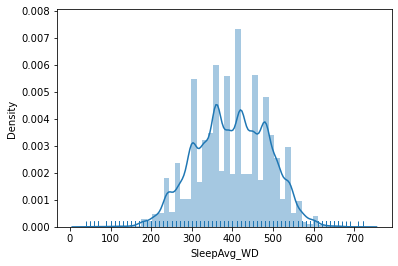

In [31]:
sns.distplot(df['SleepAvg_WD'], rug = True)

In [32]:
np.array(df.SleepAvg_WD)

array([400., 420., 460., ..., 330., 370., 350.])

In [33]:
# SleepAvg_WD의 95분위수 확인
df['SleepAvg_WD'].quantile(q = 0.95, interpolation = 'nearest')

540.0

In [34]:
df.SleepAvg_WD[df.SleepAvg_WD >= 540].value_counts().sum()

1611

In [35]:
# 주중 평균 수면 시간(분) 단위로 되있던 거를 시간 단위로 범주화시킴
df.loc[df['SleepAvg_WD'] < 60, 'SleepAvg_WD'] = 0    # 0분 이상 60분 미만
df.loc[df['SleepAvg_WD'] >= 540, 'SleepAvg_WD'] = 9  # 540 이상
df.loc[df['SleepAvg_WD'] >= 480, 'SleepAvg_WD'] = 8
df.loc[df['SleepAvg_WD'] >= 420, 'SleepAvg_WD'] = 7
df.loc[df['SleepAvg_WD'] >= 360, 'SleepAvg_WD'] = 6
df.loc[df['SleepAvg_WD'] >= 300, 'SleepAvg_WD'] = 5
df.loc[df['SleepAvg_WD'] >= 240, 'SleepAvg_WD'] = 4
df.loc[df['SleepAvg_WD'] >= 180, 'SleepAvg_WD'] = 3
df.loc[df['SleepAvg_WD'] >= 120, 'SleepAvg_WD'] = 2
df.loc[df['SleepAvg_WD'] >= 60, 'SleepAvg_WD'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepAvg_WD', ylabel='Density'>

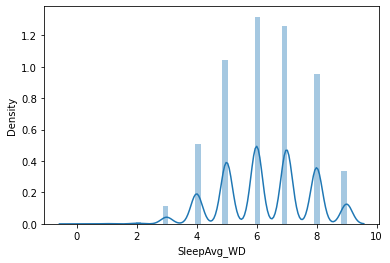

In [36]:
sns.distplot(df['SleepAvg_WD'])

In [37]:
df.SleepAvg_WD.value_counts()

6.0    6310
7.0    6034
5.0    5006
8.0    4568
4.0    2442
9.0    1611
3.0     543
2.0      52
1.0      21
0.0       3
Name: SleepAvg_WD, dtype: int64

In [38]:
df['SleepAvg_WD'].isnull().sum()

3251

## 최근 7일 동안 주말(토~일) 평균 수면 시간 변수 만들기

- M_SLP_HR_K, M_SLP_MM_K, M_WK_HR_K, M_WK_MM_K ==> 최근 7일 동안, 주말(토~일) 평균 수면 시간 변수 만들기

In [39]:
df['M_SLP_HR_K'].value_counts()

1.0     5913
2.0     5885
24.0    5516
3.0     3850
23.0    3617
4.0     1254
22.0    1249
12.0     598
5.0      503
11.0     279
21.0     228
6.0      191
13.0     189
10.0     110
14.0     107
7.0       82
9.0       62
20.0      58
8.0       50
15.0      39
16.0      25
19.0      18
18.0      10
17.0       8
Name: M_SLP_HR_K, dtype: int64

In [40]:
df.M_WK_HR_K.value_counts()

9.0     6099
8.0     6029
10.0    5446
11.0    3051
7.0     2991
12.0    1662
6.0     1221
13.0     904
14.0     523
5.0      314
20.0     269
15.0     227
21.0     189
19.0     170
18.0     117
16.0     116
4.0      104
22.0      88
17.0      80
24.0      62
3.0       59
2.0       47
1.0       37
23.0      36
Name: M_WK_HR_K, dtype: int64

In [41]:
df['M_SLP_K'] = df['M_SLP_HR_K']*60 + df['M_SLP_MM_K']

<ipython-input-41-e0798e949933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M_SLP_K'] = df['M_SLP_HR_K']*60 + df['M_SLP_MM_K']


In [42]:
df.M_SLP_K.value_counts()

120.0     4040
60.0      3858
1440.0    3336
180.0     2671
1380.0    1775
          ... 
1130.0       1
1190.0       1
1160.0       1
950.0        1
1100.0       1
Name: M_SLP_K, Length: 133, dtype: int64

In [43]:
df['M_WK_K'] = df['M_WK_HR_K']*60 + df['M_WK_MM_K']

<ipython-input-43-f45a750ece9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M_WK_K'] = df['M_WK_HR_K']*60 + df['M_WK_MM_K']


In [44]:
df.M_WK_K.value_counts()

540.0     3387
480.0     3014
600.0     2993
660.0     1787
420.0     1414
          ... 
1370.0       2
1430.0       1
110.0        1
100.0        1
1480.0       1
Name: M_WK_K, Length: 142, dtype: int64

In [45]:
ab = df.loc[:, ['M_WK_K', 'M_SLP_K']]

In [46]:
ab[ab['M_WK_K'] == ab['M_SLP_K']]

,M_WK_K,M_SLP_K
505,300.0,300.0
4272,1450.0,1450.0
4294,1440.0,1440.0
5184,1380.0,1380.0
6163,200.0,200.0
...,...,...
52924,610.0,610.0
55089,540.0,540.0
55577,150.0,150.0
56004,540.0,540.0


In [47]:
df['M_WK_K - M_SLP_K'] = df['M_WK_K'] - df['M_SLP_K']

<ipython-input-47-4c08baec49da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M_WK_K - M_SLP_K'] = df['M_WK_K'] - df['M_SLP_K']


In [48]:
df['M_WK_K - M_SLP_K'].value_counts()

 480.0     2215
 420.0     2060
 540.0     1553
 360.0     1296
-900.0     1274
           ... 
 970.0        1
-1270.0       1
-1210.0       1
 1250.0       1
-1290.0       1
Name: M_WK_K - M_SLP_K, Length: 263, dtype: int64

In [49]:
df.iloc[0]['M_WK_K'] - df.iloc[0]['M_SLP_K']

480.0

In [50]:
df['SleepAvg_WK'] = 0

<ipython-input-50-ffb997541836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SleepAvg_WK'] = 0


In [51]:
df.iloc[:, -1]

0        0
1        0
2        0
3        0
4        0
        ..
57215    0
57216    0
57217    0
57218    0
57219    0
Name: SleepAvg_WK, Length: 29841, dtype: int64

In [52]:
df.SleepAvg_WK

0        0
1        0
2        0
3        0
4        0
        ..
57215    0
57216    0
57217    0
57218    0
57219    0
Name: SleepAvg_WK, Length: 29841, dtype: int64

In [53]:
df.iloc[0, -1] = df.iloc[0]['M_WK_K'] - df.iloc[0]['M_SLP_K']
df.iloc[0]['SleepAvg_WK']

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


480.0

In [54]:
for i in range(len(df)):
    if df.iloc[i]['M_WK_K - M_SLP_K'] <= 0:
        df.iloc[i, -1] = df.iloc[i]['M_WK_K'] + 24*60 - df.iloc[i]['M_SLP_K']
    else:
        df.iloc[i, -1] = df.iloc[i]['M_WK_K'] - df.iloc[i]['M_SLP_K']

In [55]:
df.SleepAvg_WK.min()

10.0

In [56]:
df.SleepAvg_WK.max()

1440.0

In [57]:
df.SleepAvg_WK.value_counts()

480.0     3222
540.0     2827
420.0     2496
600.0     1825
360.0     1441
          ... 
40.0         5
910.0        4
1010.0       3
920.0        2
970.0        1
Name: SleepAvg_WK, Length: 144, dtype: int64

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepAvg_WK', ylabel='Density'>

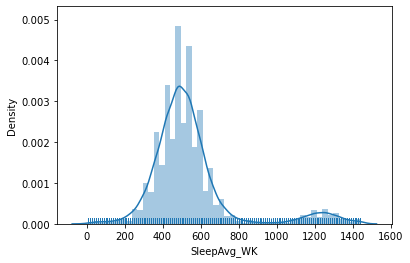

In [58]:
sns.distplot(df['SleepAvg_WK'], rug = True)

In [59]:
df['SleepAvg_WK'].quantile(q = 0.95, interpolation = 'nearest')

1190.0

In [60]:
df['SleepAvg_WK'][df['SleepAvg_WK'] >= 1190].value_counts().sum()

1500

In [61]:
# 주말 평균 수면 시간(분) 단위로 되있던 거를 시간 단위로 범주화시킴
df.loc[df['SleepAvg_WK'] < 60, 'SleepAvg_WK'] = 0    # 0분 이상 60분 미만
df.loc[df['SleepAvg_WK'] >= 1200, 'SleepAvg_WK'] = 20  # 1200분 (20시간) 이상 잔 애들
df.loc[df['SleepAvg_WK'] >= 1140, 'SleepAvg_WK'] = 19  
df.loc[df['SleepAvg_WK'] >= 1080, 'SleepAvg_WK'] = 18  
df.loc[df['SleepAvg_WK'] >= 1020, 'SleepAvg_WK'] = 17  
df.loc[df['SleepAvg_WK'] >= 960, 'SleepAvg_WK'] = 16  
df.loc[df['SleepAvg_WK'] >= 900, 'SleepAvg_WK'] = 15  
df.loc[df['SleepAvg_WK'] >= 840, 'SleepAvg_WK'] = 14  
df.loc[df['SleepAvg_WK'] >= 780, 'SleepAvg_WK'] = 13  
df.loc[df['SleepAvg_WK'] >= 720, 'SleepAvg_WK'] = 12  
df.loc[df['SleepAvg_WK'] >= 660, 'SleepAvg_WK'] = 11  # 660분 이상 720분 미만
df.loc[df['SleepAvg_WK'] >= 600, 'SleepAvg_WK'] = 10
df.loc[df['SleepAvg_WK'] >= 540, 'SleepAvg_WK'] = 9
df.loc[df['SleepAvg_WK'] >= 480, 'SleepAvg_WK'] = 8
df.loc[df['SleepAvg_WK'] >= 420, 'SleepAvg_WK'] = 7
df.loc[df['SleepAvg_WK'] >= 360, 'SleepAvg_WK'] = 6
df.loc[df['SleepAvg_WK'] >= 300, 'SleepAvg_WK'] = 5
df.loc[df['SleepAvg_WK'] >= 240, 'SleepAvg_WK'] = 4
df.loc[df['SleepAvg_WK'] >= 180, 'SleepAvg_WK'] = 3
df.loc[df['SleepAvg_WK'] >= 120, 'SleepAvg_WK'] = 2
df.loc[df['SleepAvg_WK'] >= 60, 'SleepAvg_WK'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepAvg_WK', ylabel='Density'>

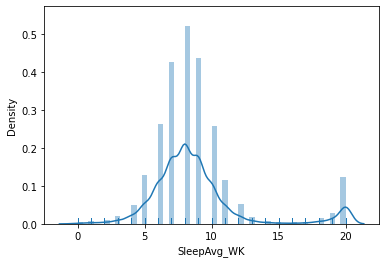

In [62]:
sns.distplot(df['SleepAvg_WK'], rug = True)

In [63]:
df.SleepAvg_WK.value_counts()

8.0     6211
9.0     5200
7.0     5075
6.0     3144
10.0    3070
5.0     1521
20.0    1458
11.0    1380
12.0     619
4.0      607
19.0     347
3.0      258
13.0     230
18.0     184
2.0      115
14.0     105
1.0       89
17.0      75
15.0      58
16.0      48
0.0       47
Name: SleepAvg_WK, dtype: int64

In [64]:
df.drop(columns=['M_SLP_HR', 'M_SLP_MM', 'M_WK_HR', 'M_WK_MM',
                 'M_SLP_HR_K', 'M_SLP_MM_K', 'M_WK_HR_K', 'M_WK_MM_K',
                 'M_SLP', 'M_WK', 'M_SLP_K', 'M_WK_K', 'M_WK_K - M_SLP_K'], axis=1, inplace=True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 최근 7일 동안, 주중 하루 평균 앉아서 보내는 시간(학습목적, 학습목적 이외) 변수 범주화

- PA_SWD_S, PA_SWD_N => 최근 7일 동안, 주중 하루 평균 앉아서 보내는 시간 변수 (학습 목적, 학습 목적 이외) 범주화

In [65]:
df.PA_SWD_S.value_counts()

600.0    2644
480.0    2304
420.0    1887
0.0      1607
540.0    1568
         ... 
189.0       1
334.0       1
558.0       1
428.0       1
502.0       1
Name: PA_SWD_S, Length: 436, dtype: int64

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWD_S', ylabel='Density'>

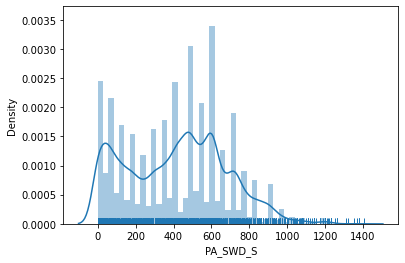

In [66]:
sns.distplot(df['PA_SWD_S'], rug=True)

In [67]:
df['PA_SWD_S'].quantile(q = 0.95, interpolation = 'nearest')

840.0

In [68]:
df['PA_SWD_S'][df['PA_SWD_S']>=840].value_counts().sum()

1861

In [69]:
df.loc[df['PA_SWD_S'] < 60, 'PA_SWD_S'] = 0
df.loc[df['PA_SWD_S'] >= 840, 'PA_SWD_S'] = 14 # 840분 (14시간) 이상 
df.loc[df['PA_SWD_S'] >= 780, 'PA_SWD_S'] = 13
df.loc[df['PA_SWD_S'] >= 720, 'PA_SWD_S'] = 12
df.loc[df['PA_SWD_S'] >= 660, 'PA_SWD_S'] = 11  # 660분 이상 720분 미만
df.loc[df['PA_SWD_S'] >= 600, 'PA_SWD_S'] = 10
df.loc[df['PA_SWD_S'] >= 540, 'PA_SWD_S'] = 9
df.loc[df['PA_SWD_S'] >= 480, 'PA_SWD_S'] = 8
df.loc[df['PA_SWD_S'] >= 420, 'PA_SWD_S'] = 7
df.loc[df['PA_SWD_S'] >= 360, 'PA_SWD_S'] = 6
df.loc[df['PA_SWD_S'] >= 300, 'PA_SWD_S'] = 5
df.loc[df['PA_SWD_S'] >= 240, 'PA_SWD_S'] = 4
df.loc[df['PA_SWD_S'] >= 180, 'PA_SWD_S'] = 3
df.loc[df['PA_SWD_S'] >= 120, 'PA_SWD_S'] = 2
df.loc[df['PA_SWD_S'] >= 60, 'PA_SWD_S'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWD_S', ylabel='Density'>

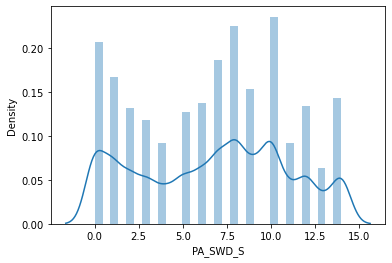

In [70]:
sns.distplot(df['PA_SWD_S'])

In [71]:
df.PA_SWD_S.value_counts()

10.0    3062
8.0     2925
0.0     2692
7.0     2422
1.0     2173
9.0     1993
14.0    1861
6.0     1792
12.0    1739
2.0     1716
5.0     1651
3.0     1538
11.0    1203
4.0     1199
13.0     820
Name: PA_SWD_S, dtype: int64

In [72]:
df.PA_SWD_N.value_counts()

120.0    6535
60.0     4845
180.0    4480
240.0    2061
300.0    1785
         ... 
670.0       1
308.0       1
607.0       1
915.0       1
263.0       1
Name: PA_SWD_N, Length: 337, dtype: int64

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWD_N', ylabel='Density'>

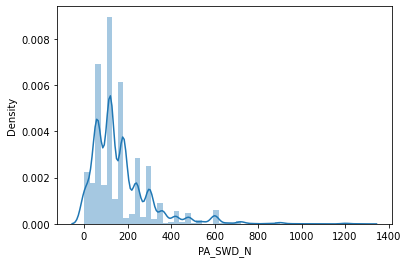

In [73]:
sns.distplot(df['PA_SWD_N'])

In [74]:
df['PA_SWD_N'].quantile(q = 0.95, interpolation = 'nearest')

420.0

In [75]:
df['PA_SWD_N'][df['PA_SWD_N'] >= 420].value_counts().sum()

1801

In [76]:
df.loc[df['PA_SWD_N'] < 60, 'PA_SWD_N'] = 0
df.loc[df['PA_SWD_N'] >= 420, 'PA_SWD_N'] = 7
df.loc[df['PA_SWD_N'] >= 360, 'PA_SWD_N'] = 6
df.loc[df['PA_SWD_N'] >= 300, 'PA_SWD_N'] = 5
df.loc[df['PA_SWD_N'] >= 240, 'PA_SWD_N'] = 4
df.loc[df['PA_SWD_N'] >= 180, 'PA_SWD_N'] = 3
df.loc[df['PA_SWD_N'] >= 120, 'PA_SWD_N'] = 2
df.loc[df['PA_SWD_N'] >= 60, 'PA_SWD_N'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWD_N', ylabel='Density'>

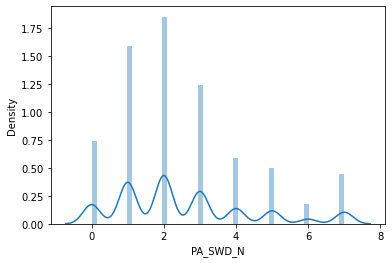

In [77]:
sns.distplot(df['PA_SWD_N'])

## 최근 7일 동안, 주말 하루 평균 앉아서 보내는 시간 변수 (학습 목적, 학습 목적 이외) 범주화

- PA_SWK_S, PA_SWK_N => 최근 7일 동안, 주말 하루 평균 앉아서 보내는 시간 변수 (학습 목적, 학습 목적 이외) 범주화

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWK_S', ylabel='Density'>

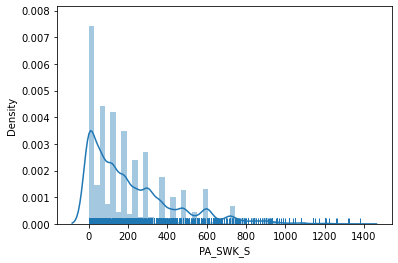

In [78]:
sns.distplot(df['PA_SWK_S'], rug=True)

In [79]:
df['PA_SWK_S'].quantile(q = 0.95, interpolation = 'nearest')

660.0

In [80]:
df['PA_SWK_S'][df['PA_SWK_S']>=660].value_counts().sum()

1540

In [81]:
# 최근 7일 동안, 주말 하루 평균 앉아서 보내는 시간 변수 (학습 목적)
df.loc[df['PA_SWK_S'] < 60, 'PA_SWK_S'] = 0
df.loc[df['PA_SWK_S'] >= 660, 'PA_SWK_S'] = 11  # 660분 이상 720분 미만
df.loc[df['PA_SWK_S'] >= 600, 'PA_SWK_S'] = 10
df.loc[df['PA_SWK_S'] >= 540, 'PA_SWK_S'] = 9
df.loc[df['PA_SWK_S'] >= 480, 'PA_SWK_S'] = 8
df.loc[df['PA_SWK_S'] >= 420, 'PA_SWK_S'] = 7
df.loc[df['PA_SWK_S'] >= 360, 'PA_SWK_S'] = 6
df.loc[df['PA_SWK_S'] >= 300, 'PA_SWK_S'] = 5
df.loc[df['PA_SWK_S'] >= 240, 'PA_SWK_S'] = 4
df.loc[df['PA_SWK_S'] >= 180, 'PA_SWK_S'] = 3
df.loc[df['PA_SWK_S'] >= 120, 'PA_SWK_S'] = 2
df.loc[df['PA_SWK_S'] >= 60, 'PA_SWK_S'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWK_S', ylabel='Density'>

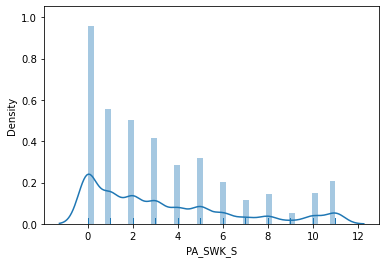

In [82]:
sns.distplot(df['PA_SWK_S'], rug=True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWK_N', ylabel='Density'>

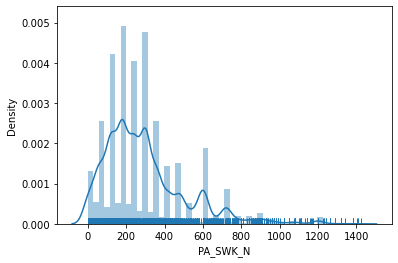

In [83]:
sns.distplot(df['PA_SWK_N'], rug=True)

In [84]:
df['PA_SWK_N'].quantile(q = 0.95, interpolation = 'nearest')

720.0

In [85]:
df['PA_SWK_N'][df['PA_SWK_N'] >= 720].value_counts().sum()

1740

In [86]:
# 최근 7일 동안, 주말 하루 평균 앉아서 보내는 시간 변수 (학습 목적 이외)
df.loc[df['PA_SWK_N'] < 60, 'PA_SWK_N'] = 0
df.loc[df['PA_SWK_N'] >= 720, 'PA_SWK_N'] = 12  # 720분 (12시간) 이상
df.loc[df['PA_SWK_N'] >= 660, 'PA_SWK_N'] = 11  # 660분 이상 720분 미만
df.loc[df['PA_SWK_N'] >= 600, 'PA_SWK_N'] = 10
df.loc[df['PA_SWK_N'] >= 540, 'PA_SWK_N'] = 9
df.loc[df['PA_SWK_N'] >= 480, 'PA_SWK_N'] = 8
df.loc[df['PA_SWK_N'] >= 420, 'PA_SWK_N'] = 7
df.loc[df['PA_SWK_N'] >= 360, 'PA_SWK_N'] = 6
df.loc[df['PA_SWK_N'] >= 300, 'PA_SWK_N'] = 5
df.loc[df['PA_SWK_N'] >= 240, 'PA_SWK_N'] = 4
df.loc[df['PA_SWK_N'] >= 180, 'PA_SWK_N'] = 3
df.loc[df['PA_SWK_N'] >= 120, 'PA_SWK_N'] = 2
df.loc[df['PA_SWK_N'] >= 60, 'PA_SWK_N'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_SWK_N', ylabel='Density'>

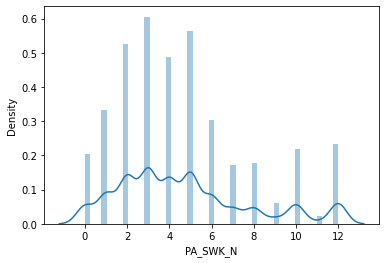

In [87]:
sns.distplot(df['PA_SWK_N'])

## 10분 이상 걷는 날의 걷는 시간 범주화

- PA_WLK_MM (10분 이상 걷는 날의 걷는 시간) => 범주화 하기

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_WLK_MM', ylabel='Density'>

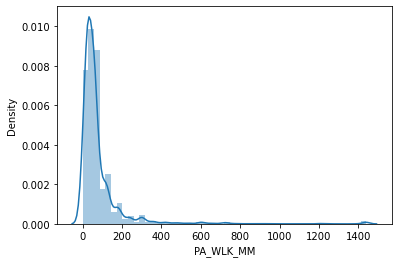

In [88]:
sns.distplot(df['PA_WLK_MM'])

In [89]:
df['PA_WLK_MM'].quantile( q = 0.95, interpolation = 'nearest')

244.0

In [90]:
df['PA_WLK_MM'][df['PA_WLK_MM'] >= 244].value_counts().sum()

1497

In [91]:
df['PA_WLK_MM'][df['PA_WLK_MM'] >= 240].value_counts().sum()

1785

In [92]:
df.loc[df['PA_WLK_MM'] < 60, 'PA_WLK_MM'] = 0
df.loc[df['PA_WLK_MM'] >= 240, 'PA_WLK_MM'] = 4
df.loc[df['PA_WLK_MM'] >= 180, 'PA_WLK_MM'] = 3
df.loc[df['PA_WLK_MM'] >= 120, 'PA_WLK_MM'] = 2
df.loc[df['PA_WLK_MM'] >= 60, 'PA_WLK_MM'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_WLK_MM', ylabel='Density'>

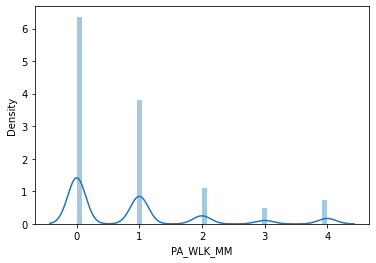

In [93]:
sns.distplot(df['PA_WLK_MM'])

In [94]:
df.PA_WLK_MM.value_counts()

0.0    15188
1.0     9079
2.0     2656
4.0     1785
3.0     1133
Name: PA_WLK_MM, dtype: int64

## 장소 이동 신체활동 시간 범주화

- PA_TRA_MM (장소 이동 신체활동 시간) => 범주화 하기

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_TRA_MM', ylabel='Density'>

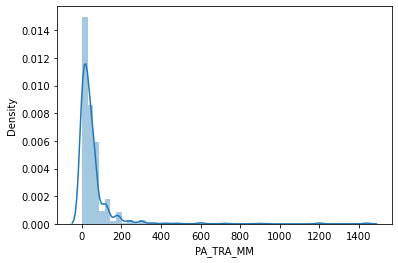

In [95]:
sns.distplot(df['PA_TRA_MM'])

In [96]:
df['PA_TRA_MM'].quantile(q = 0.95, interpolation = 'nearest')

180.0

In [97]:
df['PA_TRA_MM'][df['PA_TRA_MM'] >= 180].value_counts().sum()

1963

In [98]:
df.loc[df['PA_TRA_MM'] < 60, 'PA_TRA_MM'] = 0
df.loc[df['PA_TRA_MM'] >= 180, 'PA_TRA_MM'] = 3
df.loc[df['PA_TRA_MM'] >= 120, 'PA_TRA_MM'] = 2
df.loc[df['PA_TRA_MM'] >= 60, 'PA_TRA_MM'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PA_TRA_MM', ylabel='Density'>

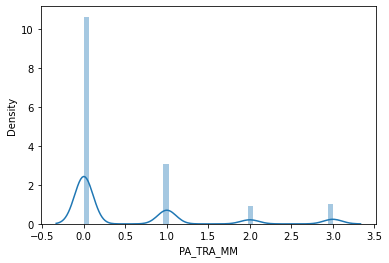

In [99]:
sns.distplot(df['PA_TRA_MM'])

In [100]:
df.PA_TRA_MM.value_counts()

0.0    20285
1.0     5847
3.0     1963
2.0     1746
Name: PA_TRA_MM, dtype: int64

In [101]:
# "공통 변수" (13개) 버리기
df.drop(['mod_d', 'YEAR', 'CITY', 'CTYPE', 'CTYPE_SD', 'MH', 'SCHOOL', 'STYPE',
         'STRATA', 'STRATA_NM', 'CLUSTER', 'GROUP', 'W', 'OBS'], axis=1, inplace=True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
df.shape

(29841, 161)

## 최근 30일 동안, 학습 이외의 목적으로 주중(월~금) 하루 평균 인터넷 사용 시간 ( INT_WD_MM )

In [103]:
df.INT_WD.value_counts()

2.0    21244
1.0     8597
Name: INT_WD, dtype: int64

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_WD_MM', ylabel='Density'>

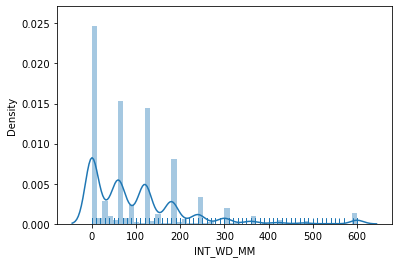

In [104]:
sns.distplot(df['INT_WD_MM'], rug = True)

In [105]:
df['INT_WD_MM'].quantile(q = 0.95, interpolation = 'nearest')

300.0

In [106]:
df['INT_WD_MM'][df['INT_WD_MM'] >= 300].value_counts().sum()

2078

In [107]:
df.loc[df['INT_WD_MM'] < 60, 'INT_WD_MM'] = 0
df.loc[df['INT_WD_MM'] >= 300, 'INT_WD_MM'] = 5
df.loc[df['INT_WD_MM'] >= 240, 'INT_WD_MM'] = 4
df.loc[df['INT_WD_MM'] >= 180, 'INT_WD_MM'] = 3
df.loc[df['INT_WD_MM'] >= 120, 'INT_WD_MM'] = 2
df.loc[df['INT_WD_MM'] >= 60, 'INT_WD_MM'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-107-d33a1a2e960d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['INT_WD_MM'] < 60, 'INT_WD_MM'] = 0
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_WD_MM', ylabel='Density'>

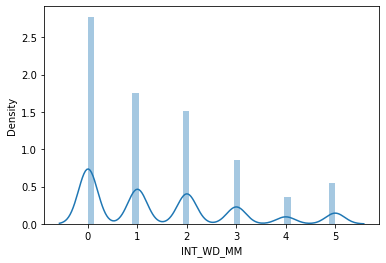

In [108]:
sns.distplot(df['INT_WD_MM'])

## 최근 30일 동안, 학습 이외의 목적으로 주말 하루 평균 인터넷 사용 시간 ( INT_WK_MM )

In [109]:
df.INT_WK.value_counts()

2.0    23045
1.0     6796
Name: INT_WK, dtype: int64

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_WK_MM', ylabel='Density'>

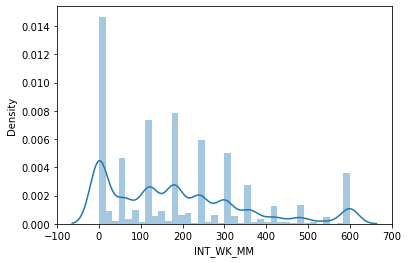

In [110]:
sns.distplot(df['INT_WK_MM'])

In [111]:
df['INT_WK_MM'].quantile(q = 0.95, interpolation = 'nearest')

600.0

In [112]:
df.loc[df['INT_WK_MM'] < 60, 'INT_WK_MM'] = 0
df.loc[df['INT_WK_MM'] >= 600, 'INT_WK_MM'] = 10
df.loc[df['INT_WK_MM'] >= 540, 'INT_WK_MM'] = 9
df.loc[df['INT_WK_MM'] >= 480, 'INT_WK_MM'] = 8
df.loc[df['INT_WK_MM'] >= 420, 'INT_WK_MM'] = 7
df.loc[df['INT_WK_MM'] >= 360, 'INT_WK_MM'] = 6
df.loc[df['INT_WK_MM'] >= 300, 'INT_WK_MM'] = 5
df.loc[df['INT_WK_MM'] >= 240, 'INT_WK_MM'] = 4
df.loc[df['INT_WK_MM'] >= 180, 'INT_WK_MM'] = 3
df.loc[df['INT_WK_MM'] >= 120, 'INT_WK_MM'] = 2
df.loc[df['INT_WK_MM'] >= 60, 'INT_WK_MM'] = 1

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-112-0f6873180b3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['INT_WK_MM'] < 60, 'INT_WK_MM'] = 0
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer

C:\Users\SeongHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_WK_MM', ylabel='Density'>

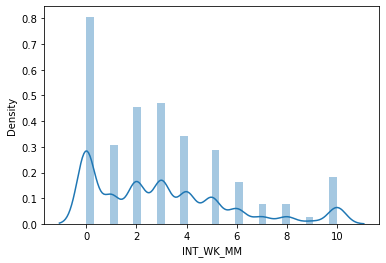

In [113]:
sns.distplot(df['INT_WK_MM'])

## 명목형 변수 ==> 순서형 변수 변환

In [114]:
df.shape

(29841, 161)

In [115]:
# O_SYMP1_1
print(df.O_SYMP1_1.value_counts())

df['O_SYMP1_1'] = df['O_SYMP1_1'].replace({1:2})
df['O_SYMP1_1'] = df['O_SYMP1_1'].replace({0:1})
df['O_SYMP1_1'] = df['O_SYMP1_1'].replace({9999:0})

print(df.O_SYMP1_1.value_counts())

9999.0    26980
0.0        1515
1.0        1346
Name: O_SYMP1_1, dtype: int64
0.0    26980
1.0     1515
2.0     1346
Name: O_SYMP1_1, dtype: int64


<ipython-input-115-670e0a1737ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['O_SYMP1_1'] = df['O_SYMP1_1'].replace({1:2})
<ipython-input-115-670e0a1737ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['O_SYMP1_1'] = df['O_SYMP1_1'].replace({0:1})
<ipython-input-115-670e0a1737ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [116]:
# AC_FAGE

print(df.AC_FAGE.value_counts())

df['AC_FAGE'] = df['AC_FAGE'].replace({9999:14})
print(df.AC_FAGE.value_counts())


9999.0    17250
9.0        2235
10.0       2219
8.0        1832
11.0       1583
7.0        1061
1.0         844
12.0        834
6.0         526
5.0         417
4.0         353
13.0        295
3.0         224
2.0         133
Name: AC_FAGE, dtype: int64
14.0    17250
9.0      2235
10.0     2219
8.0      1832
11.0     1583
7.0      1061
1.0       844
12.0      834
6.0       526
5.0       417
4.0       353
13.0      295
3.0       224
2.0       133
Name: AC_FAGE, dtype: int64


<ipython-input-116-ca4ac06d9c27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AC_FAGE'] = df['AC_FAGE'].replace({9999:14})


In [117]:
# AC_DAYS
print(df.AC_DAYS.value_counts())

df['AC_DAYS'] = df['AC_DAYS'].replace({9999:0})
print(df.AC_DAYS.value_counts())

9999.0    17250
1.0        7750
2.0        2619
3.0         948
4.0         585
5.0         382
6.0         157
7.0         150
Name: AC_DAYS, dtype: int64
0.0    17250
1.0     7750
2.0     2619
3.0      948
4.0      585
5.0      382
6.0      157
7.0      150
Name: AC_DAYS, dtype: int64


<ipython-input-117-342855784035>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AC_DAYS'] = df['AC_DAYS'].replace({9999:0})


In [118]:
# AC_AMNT
print(df.AC_AMNT.value_counts())

df['AC_AMNT'] = df['AC_AMNT'].replace({9999:0})
print(df.AC_AMNT.value_counts())

9999.0    25000
1.0        1702
4.0        1051
2.0         844
5.0         837
3.0         407
Name: AC_AMNT, dtype: int64
0.0    25000
1.0     1702
4.0     1051
2.0      844
5.0      837
3.0      407
Name: AC_AMNT, dtype: int64


<ipython-input-118-151935db235e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AC_AMNT'] = df['AC_AMNT'].replace({9999:0})


In [119]:
# AC_DRUNK
print(df.AC_DRUNK.value_counts())

df['AC_DRUNK'] = df['AC_DRUNK'].replace({9999:0})
print(df.AC_DRUNK.value_counts())

9999.0    25000
1.0        4174
2.0         444
4.0         129
3.0          94
Name: AC_DRUNK, dtype: int64
0.0    25000
1.0     4174
2.0      444
4.0      129
3.0       94
Name: AC_DRUNK, dtype: int64


<ipython-input-119-ad807d2bb33a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AC_DRUNK'] = df['AC_DRUNK'].replace({9999:0})


In [120]:
# TC_DAYS
print(df.TC_DAYS.value_counts())
df['TC_DAYS'] = df['TC_DAYS'].replace({9999:0})
print(df.TC_DAYS.value_counts())

9999.0    24842
1.0        2369
7.0        1328
2.0         453
5.0         260
6.0         237
3.0         189
4.0         163
Name: TC_DAYS, dtype: int64
0.0    24842
1.0     2369
7.0     1328
2.0      453
5.0      260
6.0      237
3.0      189
4.0      163
Name: TC_DAYS, dtype: int64


<ipython-input-120-98a8fe418bfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TC_DAYS'] = df['TC_DAYS'].replace({9999:0})


In [121]:
# TC_EC_MN

print(df.TC_EC_MN.value_counts())

df['TC_EC_MN'] = df['TC_EC_MN'].replace({9999:0})
print(df.TC_EC_MN.value_counts())


9999.0    26673
1.0        1861
2.0         402
7.0         262
3.0         240
4.0         160
5.0         155
6.0          88
Name: TC_EC_MN, dtype: int64
0.0    26673
1.0     1861
2.0      402
7.0      262
3.0      240
4.0      160
5.0      155
6.0       88
Name: TC_EC_MN, dtype: int64


<ipython-input-121-3676ba3cfaa1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TC_EC_MN'] = df['TC_EC_MN'].replace({9999:0})


In [122]:
# TC_HTP_MN

print(df.TC_HTP_MN.value_counts())

df['TC_HTP_MN'] = df['TC_HTP_MN'].replace({9999:0})
print(df.TC_HTP_MN.value_counts())

9999.0    27771
1.0        1002
2.0         339
7.0         210
3.0         200
5.0         132
4.0         132
6.0          55
Name: TC_HTP_MN, dtype: int64
0.0    27771
1.0     1002
2.0      339
7.0      210
3.0      200
5.0      132
4.0      132
6.0       55
Name: TC_HTP_MN, dtype: int64


<ipython-input-122-ba9f712e0166>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TC_HTP_MN'] = df['TC_HTP_MN'].replace({9999:0})


In [123]:
# TC_FAGE

print(df.TC_FAGE.value_counts())

df['TC_FAGE'] = df['TC_FAGE'].replace({9999:14})
print(df.TC_FAGE.value_counts())

9999.0    24382
9.0        1364
8.0        1170
10.0        836
11.0        546
7.0         428
6.0         218
1.0         201
12.0        198
5.0         156
4.0         118
13.0         76
2.0          55
3.0          52
Name: TC_FAGE, dtype: int64
14.0    24382
9.0      1364
8.0      1170
10.0      836
11.0      546
7.0       428
6.0       218
1.0       201
12.0      198
5.0       156
4.0       118
13.0       76
2.0        55
3.0        52
Name: TC_FAGE, dtype: int64


<ipython-input-123-ee2c5b591c39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TC_FAGE'] = df['TC_FAGE'].replace({9999:14})


In [124]:
# TC_AMNT
print(df.TC_AMNT.value_counts())

df['TC_AMNT'] = df['TC_AMNT'].replace({9999:0})
print(df.TC_AMNT.value_counts())

9999.0    26952
3.0         707
1.0         666
4.0         594
5.0         437
6.0         252
2.0         233
Name: TC_AMNT, dtype: int64
0.0    26952
3.0      707
1.0      666
4.0      594
5.0      437
6.0      252
2.0      233
Name: TC_AMNT, dtype: int64


<ipython-input-124-1fe4c8baaac6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TC_AMNT'] = df['TC_AMNT'].replace({9999:0})


In [125]:
# DR_LT
print(df.DR_LT.value_counts())

df['DR_LT'] = df['DR_LT'].replace({9999:0})
print(df.DR_LT.value_counts())

9999.0    29515
1.0         193
3.0          77
2.0          56
Name: DR_LT, dtype: int64
0.0    29515
1.0      193
3.0       77
2.0       56
Name: DR_LT, dtype: int64

<ipython-input-125-c46d522348ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DR_LT'] = df['DR_LT'].replace({9999:0})


In [126]:
# AS_DG_YR
print(df.AS_DG_YR.value_counts())

df['AS_DG_YR'] = df['AS_DG_YR'].replace({9999:0})
print(df.AS_DG_YR.value_counts())

9999.0    27541
1.0        1760
2.0         540
Name: AS_DG_YR, dtype: int64
0.0    27541
1.0     1760
2.0      540
Name: AS_DG_YR, dtype: int64


<ipython-input-126-8903b075e0ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AS_DG_YR'] = df['AS_DG_YR'].replace({9999:0})


In [127]:
df.shape

(29841, 161)

## BMI 타겟 변수 만들기 (비만 0 (no) or  비만 1 (Yes))

In [129]:
df['BMI'] = (df['WT'] / (df['HT'] / 100)**2)  # BMI 생성
# BMI YES / NO 할당
df.loc[df['BMI'] < 25, 'BMI'] = 0
df.loc[df['BMI'] >= 25, 'BMI'] = 1

<ipython-input-129-771fa06b8cfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = (df['WT'] / (df['HT'] / 100)**2)  # BMI 생성
C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-129-771fa06b8cfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [130]:
df[['BMI']].value_counts()

BMI
0.0    23036
1.0     6023
dtype: int64

In [131]:
df.BMI.value_counts()

0.0    23036
1.0     6023
Name: BMI, dtype: int64

In [132]:
df.drop(columns=['HT', 'WT'], axis=True, inplace=True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
'HT' in df.columns

False

In [134]:
'WT' in df.columns

False

In [135]:
# 0223 교수님 피드백에 따라 변수 추가 제거 목록
df.drop(columns = ['AGE_M', 'PR_BI'], axis = 1, inplace = True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 10% rule로 변수 제거

In [136]:
a = df.isnull().sum() >= 2984

In [137]:
a

PR_HT          False
F_BR           False
F_FRUIT        False
F_SODA         False
F_CAFFEINE     False
               ...  
E_KRN_M        False
E_BORN_M       False
SleepAvg_WD     True
SleepAvg_WK    False
BMI            False
Length: 158, dtype: bool

In [138]:
b = pd.DataFrame(a)

In [139]:
b

,0
PR_HT,False
F_BR,False
F_FRUIT,False
F_SODA,False
F_CAFFEINE,False
...,...
E_KRN_M,False
E_BORN_M,False
SleepAvg_WD,True
SleepAvg_WK,False


In [140]:
c = b[b[0] == True]

In [141]:
c.reset_index(inplace=True)

In [142]:
c

,index,0
0,SleepAvg_WD,True


In [143]:
drop_columns_list = c['index']

In [144]:
df.drop(drop_columns_list, axis=1, inplace=True)

C:\Users\SeongHee\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [145]:
df

,PR_HT,F_BR,F_FRUIT,F_SODA,F_CAFFEINE,F_SWDRINK,F_FASTFOOD,F_VEG,F_MILK,F_EDU,...,E_LT_M,E_LT_SM,E_EDU_F,E_KRN_F,E_BORN_F,E_EDU_M,E_KRN_M,E_BORN_M,SleepAvg_WK,BMI
0,4.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,...,1.0,9999.0,3.0,1.0,9999.0,3.0,1.0,9999.0,8.0,0.0
1,3.0,4.0,7.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,5.0,0.0
2,1.0,1.0,7.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,9999.0,2.0,1.0,9999.0,3.0,1.0,9999.0,14.0,1.0
3,3.0,4.0,6.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,7.0,1.0
4,1.0,8.0,6.0,2.0,2.0,2.0,1.0,7.0,3.0,2.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57215,1.0,1.0,2.0,1.0,1.0,2.0,1.0,7.0,5.0,1.0,...,1.0,9999.0,4.0,1.0,9999.0,4.0,2.0,5.0,10.0,1.0
57216,3.0,7.0,2.0,1.0,2.0,2.0,3.0,4.0,5.0,2.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8.0,0.0
57217,2.0,8.0,3.0,2.0,2.0,4.0,2.0,4.0,5.0,1.0,...,1.0,9999.0,2.0,1.0,9999.0,2.0,1.0,9999.0,8.0,1.0
57218,1.0,8.0,2.0,2.0,1.0,2.0,2.0,2.0,4.0,1.0,...,1.0,9999.0,2.0,1.0,9999.0,2.0,1.0,9999.0,8.0,0.0


In [146]:
# 완전 제거법 적용
df.dropna(inplace=True)

<ipython-input-146-21c64ac32d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [147]:
df.reset_index(drop=True, inplace=True)

In [148]:
df

,PR_HT,F_BR,F_FRUIT,F_SODA,F_CAFFEINE,F_SWDRINK,F_FASTFOOD,F_VEG,F_MILK,F_EDU,...,E_LT_M,E_LT_SM,E_EDU_F,E_KRN_F,E_BORN_F,E_EDU_M,E_KRN_M,E_BORN_M,SleepAvg_WK,BMI
0,4.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,...,1.0,9999.0,3.0,1.0,9999.0,3.0,1.0,9999.0,8.0,0.0
1,3.0,4.0,7.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,5.0,0.0
2,1.0,1.0,7.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,9999.0,2.0,1.0,9999.0,3.0,1.0,9999.0,14.0,1.0
3,3.0,4.0,6.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,7.0,1.0
4,1.0,8.0,6.0,2.0,2.0,2.0,1.0,7.0,3.0,2.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27695,1.0,1.0,2.0,1.0,1.0,2.0,1.0,7.0,5.0,1.0,...,1.0,9999.0,4.0,1.0,9999.0,4.0,2.0,5.0,10.0,1.0
27696,3.0,7.0,2.0,1.0,2.0,2.0,3.0,4.0,5.0,2.0,...,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8.0,0.0
27697,2.0,8.0,3.0,2.0,2.0,4.0,2.0,4.0,5.0,1.0,...,1.0,9999.0,2.0,1.0,9999.0,2.0,1.0,9999.0,8.0,1.0
27698,1.0,8.0,2.0,2.0,1.0,2.0,2.0,2.0,4.0,1.0,...,1.0,9999.0,2.0,1.0,9999.0,2.0,1.0,9999.0,8.0,0.0


In [149]:
df.shape

(27700, 157)

In [150]:
df.to_csv('kyrbs2019_boy.csv')